# Prediction of forest fire in Portugal

Through a regression model, we will predict the damaged areas by forest fire on a  region of Portugal. The prediction consist on whether a forest fire can be affected by a fire, and if it is, how many hectareas can be the fire affect.


## 1. Data

The data is downloaded from UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Forest+Fires
Data Set Information:

#### Prior results
In [Cortez and Morais, 2007], the output 'area' was first transformed with a ln(x+1) function. Then, several Data Mining methods were applied. After fitting the models, the outputs were post-processed with the inverse of the ln(x+1) transform. Four different input setups were used. The experiments were conducted using a 10-fold (cross-validation) x 30 runs. Two regression metrics were measured: MAD and RMSE. A Gaussian support vector machine (SVM) fed with only 4 direct weather conditions (temp, RH, wind and rain) obtained the best MAD value: 12.71 +- 0.01 (mean and confidence interval within 95% using a t-student distribution). The best RMSE was attained by the naive mean predictor. An analysis to the regression error curve (REC) shows that the SVM model predicts more examples within a lower admitted error. In effect, the SVM model predicts better small fires, which are the majority. 

### Features

1. `X `- x-axis spatial coordinate within the Montesinho park map: 1 to 9
2. `Y `- y-axis spatial coordinate within the Montesinho park map: 2 to 9
3. `month` - month of the year: 'jan' to 'dec'
4. `day` - day of the week: 'mon' to 'sun'
5. `FFMC` - FFMC (Fine Fuel Moisture Code) index from the FWI system: 18.7 to 96.20
6. `DMC` - DMC (Dufe moisture Code) index from the FWI system: 1.1 to 291.3
7. `DC` - DC (Drought Code) index from the FWI (Fire Weather Index) system: 7.9 to 860.6
8. `ISI` - ISI (Initial Spread Index) index from the FWI system: 0.0 to 56.10
9. `temp` - temperature in Celsius degrees: 2.2 to 33.30
10. `RH` - relative humidity in %: 15.0 to 100
11. `wind` - wind speed in km/h: 0.40 to 9.40
12. `rain` - outside rain in mm/m2 : 0.0 to 6.4
13. `area` - the burned area of the forest (in ha): 0.00 to 1090.84 

`FFMC`: Denotes the moisture content surface litter and influences ignition and fire spread. 

`DMC and DC`: Represent the moisture content of shallow and deep organic layers, which affect fire intensity.

`ISI`: Score that correlates with fire velocity spread.

### Objectives

We will build a regression model able to predict the burned area by forest fire according with the above features. As we have pre processed different dataset through statistical analysis, We will proceed to use some of them to develop the most possible efficient model. In this notebook we will use support machine Regression (SVR).

In [207]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

In [208]:
data=pd.read_csv('forestfires.csv')

In [29]:
# Transforming categorical data month into numbers
def cat_trans(X):
    X['month'] = X['month'].replace('jan', 1)
    X['month'] = X['month'].replace('feb', 2)
    X['month'] = X['month'].replace('mar', 3)
    X['month'] = X['month'].replace('apr', 4)
    X['month'] = X['month'].replace('may', 5)
    X['month'] = X['month'].replace('jun', 6)
    X['month'] = X['month'].replace('jul', 7)
    X['month'] = X['month'].replace('aug', 8)
    X['month'] = X['month'].replace('sep', 9)
    X['month'] = X['month'].replace('oct', 10)
    X['month'] = X['month'].replace('nov', 11)
    X['month'] = X['month'].replace('dec', 12)
#     X['day'] = X['day'].replace('sun', 1)
#     X['day'] = X['day'].replace('mon', 2)
#     X['day'] = X['day'].replace('tue', 3)
#     X['day'] = X['day'].replace('wed', 4)
#     X['day'] = X['day'].replace('thu', 5)
#     X['day'] = X['day'].replace('fri', 6)
#     X['day'] = X['day'].replace('sat', 7)
    
    return X

In [32]:
def scaler_min_max(X_train, X_test, y_train, y_test):
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    y_train = np.array(y_train).reshape(-1,1)
    y_test = np.array(y_test).reshape(-1,1)
    y_train_scaled = scaler.fit_transform(y_train)
    y_test_scaled = scaler.fit_transform(y_test)
    
    return X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled

In [209]:
def model_test(model, data):
    np.random.seed(42)
                  
    data.drop(['ISI', 'wind', 'rain', 'day', 'X', 'Y'], axis=1, inplace=True)
    
    
    X = data.drop('area', axis=1)
    y = data['area']
    
    X = cat_trans(X)
    
    #Splitting the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    
    # Scaling the features
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    y_train = np.array(y_train).reshape(-1,1)
    y_test = np.array(y_test).reshape(-1,1)
    y_train_scaled = scaler.fit_transform(y_train)
    y_test_scaled = scaler.fit_transform(y_test)
    
    # Fitting the model
    model.fit(X_train_scaled, y_train_scaled)
    
    # Making predictions
    pred = model.predict(X_test_scaled)
    
    pred_u = scaler.inverse_transform(np.array(pred).reshape(-1, 1))
    y_test_u = scaler.inverse_transform(np.array(y_test_scaled).reshape(-1, 1))
    diff = np.array(pred_u) - np.array(y_test_u)
    summary_diff = pd.DataFrame(np.concatenate((pred_u, y_test_u, diff), axis=1), columns=["Predictions", "Real", "Difference"])
    
    
    
    return print(
    "R2 square: ", r2_score(y_test_scaled, pred), " Mean Absolute Error: ", mean_absolute_error(y_test_scaled, pred),
        " Mean Squared Error: ", mean_squared_error(y_test_scaled, pred), "\n", 
     summary_diff, model,"\n\n Mean of the difference: ",np.mean(diff)
        #X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled, diff
    )

## 1. Using the original dataset

In [210]:
from sklearn.svm import SVR
model = SVR()
data = pd.read_csv('forestfires.csv')

data.head()


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [69]:
data.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


#### Summary

We notice that area has a mean of 12.84742 ha and has a maximum of 1090 and minimum of 0.

In [81]:
outlier = data[data.area>6.57]
len(outlier)

129

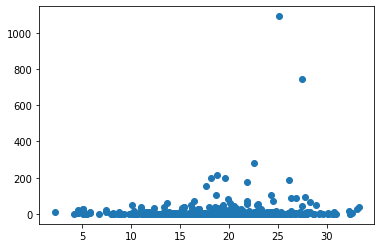

In [83]:
plt.scatter(data.temp, data.area)

Over the 75% percentile, our data present 129 values, leading by the outliers seen in the figure. We will scale the our dataset and study how effective is our model when including both outliers.

### Modelling 

In [211]:
np.random.seed(42)

data.drop(['ISI', 'wind', 'rain', 'day', 'X', 'Y'], axis=1, inplace=True)


X = data.drop('area', axis=1)
y = data['area']

X = cat_trans(X)

#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Scaling the features using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
y_train = np.array(y_train).reshape(-1,1)
y_test = np.array(y_test).reshape(-1,1)
y_train_scaled = scaler.fit_transform(y_train)
y_test_scaled = scaler.fit_transform(y_test)

# Fitting the model
model.fit(X_train_scaled, y_train_scaled)

# Making predictions
pred = model.predict(X_test_scaled)

pred_u = scaler.inverse_transform(np.array(pred).reshape(-1, 1))
y_test_u = scaler.inverse_transform(np.array(y_test_scaled).reshape(-1, 1))
diff = np.array(pred_u) - np.array(y_test_u)
summary_diff = pd.DataFrame(np.concatenate((pred_u, y_test_u, diff), axis=1), columns=["Predictions", "Real", "Difference"])



print(
"R2 square: ", r2_score(y_test_scaled, pred), " Mean Absolute Error: ", mean_absolute_error(y_test_scaled, pred),
    " Mean Squared Error: ", mean_squared_error(y_test_scaled, pred), 
 )

R2 square:  -0.7892307301121739  Mean Absolute Error:  0.09440043403435114  Mean Squared Error:  0.014245782970863024


C:\Users\sandra\Desktop\Miniconda_projects\projects\forest_fires\env\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [212]:
np.mean(y_test_scaled), np.mean(model.predict(X_test_scaled))
# We notice the mean of the prediction and the mean of the y_test have a huge difference

(0.015284833424065575, 0.09426401696315365)

#### Evaluating the unscaled prediction with the real label test:

In [100]:
r2_score(y_test, pred_u), mean_absolute_error(y_test, pred_u), mean_squared_error(y_test, pred_u)

(-0.789230730112173, 102.9757694620316, 16951.511677283062)

In [103]:
summary_diff, print("\n\n Mean of the difference between the predictions and the real values: ", np.mean(diff))



 Mean of the difference between the predictions and the real values:  86.15365257177882


(     Predictions   Real  Difference
 0     102.988731   0.00  102.988731
 1     108.052147   0.00  108.052147
 2     110.043217   1.23  108.813217
 3     104.423782   1.46  102.963782
 4     100.783189   1.95   98.833189
 ..           ...    ...         ...
 125    92.434055   0.00   92.434055
 126   101.479633   5.80   95.679633
 127   104.109720   3.93  100.179720
 128   106.290055   0.00  106.290055
 129   112.403316  22.03   90.373316
 
 [130 rows x 3 columns],
 None)

### Results

The SVR model with the original data has a very poor effectiveness. We will proceed to model the dataset that does not present the two biggest outliers

## 2. Using the dataset without outlier

In [117]:
data_cl = pd.read_csv('forestfires_no_outliers.csv')
data_cl.drop('Unnamed: 0', axis=1, inplace=True)
data_cl.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,4,5,1,1,18.7,1.1,171.4,0.0,5.2,100,0.9,0.0,0.00
1,2,4,1,7,82.1,3.7,9.3,2.9,5.3,78,3.1,0.0,0.00
2,5,4,2,1,86.8,15.6,48.3,3.9,12.4,53,2.2,0.0,6.38
3,7,4,2,1,83.9,8.7,32.1,2.1,8.8,68,2.2,0.0,13.05
4,6,3,2,1,84.9,27.5,353.5,3.4,4.2,51,4.0,0.0,0.00


In [118]:
data_cl.describe()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000
mean,4.660194,4.295146,7.471845,3.965049,90.633010,110.635922,547.401942,9.013010,18.860388,44.355340,4.015922,0.021748,9.329961
std,2.312853,1.229610,2.279302,2.143387,5.527184,63.980106,248.396286,4.563223,5.798962,16.313441,1.794712,0.296531,27.350635
min,1.000000,2.000000,1.000000,1.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,7.000000,2.000000,90.200000,65.450000,435.500000,6.450000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,8.000000,4.000000,91.600000,108.300000,661.800000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,9.000000,6.000000,92.900000,141.850000,713.900000,10.750000,22.800000,53.000000,4.900000,0.000000,6.490000
max,9.000000,9.000000,12.000000,7.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,278.530000


In [119]:
outlier = data_cl[data_cl.area>6.57]
len(outlier)

127

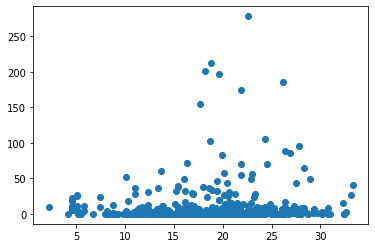

In [120]:
plt.scatter(data_cl.temp, data_cl.area)

We see a few small outliers, but let's see how much affect our model. It is not as big as the prior ones.

### Modelling

In [121]:
np.random.seed(42)

data_cl.drop(['ISI', 'wind', 'rain', 'day', 'X', 'Y'], axis=1, inplace=True)


X = data_cl.drop('area', axis=1)
y = data_cl['area']

X = cat_trans(X)

#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Scaling the features using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
y_train = np.array(y_train).reshape(-1,1)
y_test = np.array(y_test).reshape(-1,1)
y_train_scaled = scaler.fit_transform(y_train)
y_test_scaled = scaler.fit_transform(y_test)

# Fitting the model
model.fit(X_train_scaled, y_train_scaled)

# Making predictions
pred = model.predict(X_test_scaled)

pred_u = scaler.inverse_transform(np.array(pred).reshape(-1, 1))
y_test_u = scaler.inverse_transform(np.array(y_test_scaled).reshape(-1, 1))
diff = np.array(pred_u) - np.array(y_test_u)
summary_diff = pd.DataFrame(np.concatenate((pred_u, y_test_u, diff), axis=1), columns=["Predictions", "Real", "Difference"])



print(
"R2 square: ", r2_score(y_test_scaled, pred), " Mean Absolute Error: ", mean_absolute_error(y_test_scaled, pred),
    " Mean Squared Error: ", mean_squared_error(y_test_scaled, pred), 
 )

R2 square:  -0.06782493422597224  Mean Absolute Error:  0.0960154231044398  Mean Squared Error:  0.01927347943275733


C:\Users\sandra\Desktop\Miniconda_projects\projects\forest_fires\env\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [122]:
np.mean(y_test_scaled), np.mean(model.predict(X_test_scaled))


(0.06122222928079151, 0.09439895147902463)

In [123]:
r2_score(y_test, pred_u), mean_absolute_error(y_test, pred_u), mean_squared_error(y_test, pred_u)

(-0.06782493422597247, 9.13874797108058, 174.60292933796882)

#### Results
This dataset gives us a better result of mean absolute error and mean_squared error

### Hyperparameter Tuning

In [128]:
from sklearn.model_selection import RandomizedSearchCV

def svr_tuning_model(data):
    np.random.seed(42)
    data.drop('Unnamed: 0', axis=1, inplace=True)
    data.drop(['ISI', 'wind', 'rain', 'day', 'X', 'Y'], axis=1, inplace=True)

    X = data.drop('area', axis=1)
    y = data['area']

    X = cat_trans(X)

    #Splitting the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

    # Scaling the features
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    y_train = np.array(y_train).reshape(-1,1)
    y_test = np.array(y_test).reshape(-1,1)
    y_train_scaled = scaler.fit_transform(y_train)
    y_test_scaled = scaler.fit_transform(y_test)


    # Different Support Vector Regressor hyperparameter
    rf_grid = {"gamma": ["auto", "scale"],
              "kernel": ["linear", "poly", "rbf", "sigmoid"]

              }  # limiting the maximum to save time

    # Instantiate RandomizedSearchCV model
    svr_model = RandomizedSearchCV(SVR(),
                                  param_distributions=rf_grid,
                                  n_iter = 100, 
                                  cv=20,
                                  verbose=True
                                 )
    # Fit the RandomizedSearchCV model
    svr_model.fit(X_train_scaled, y_train_scaled)
    
    return print(svr_model.best_params_)
    

In [129]:
data_cl = pd.read_csv('forestfires_no_outliers.csv')
#data_cl.drop('Unnamed: 0', axis=1, inplace=True)
svr_tuning_model(data_cl)

C:\Users\sandra\Desktop\Miniconda_projects\projects\forest_fires\env\lib\site-packages\sklearn\model_selection\_search.py:277: UserWarning: The total space of parameters 8 is smaller than n_iter=100. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\sandra\Desktop\Miniconda_projects\projects\forest_fires\env\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sandra\Desktop\Miniconda_projects\projects\forest_fires\env\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sandra\Des

Fitting 20 folds for each of 8 candidates, totalling 160 fits


C:\Users\sandra\Desktop\Miniconda_projects\projects\forest_fires\env\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sandra\Desktop\Miniconda_projects\projects\forest_fires\env\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sandra\Desktop\Miniconda_projects\projects\forest_fires\env\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sandra\Desktop\Miniconda_projects\projects\forest_fires\env\lib\

C:\Users\sandra\Desktop\Miniconda_projects\projects\forest_fires\env\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sandra\Desktop\Miniconda_projects\projects\forest_fires\env\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sandra\Desktop\Miniconda_projects\projects\forest_fires\env\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sandra\Desktop\Miniconda_projects\projects\forest_fires\env\lib\

C:\Users\sandra\Desktop\Miniconda_projects\projects\forest_fires\env\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sandra\Desktop\Miniconda_projects\projects\forest_fires\env\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sandra\Desktop\Miniconda_projects\projects\forest_fires\env\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sandra\Desktop\Miniconda_projects\projects\forest_fires\env\lib\

C:\Users\sandra\Desktop\Miniconda_projects\projects\forest_fires\env\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sandra\Desktop\Miniconda_projects\projects\forest_fires\env\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sandra\Desktop\Miniconda_projects\projects\forest_fires\env\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sandra\Desktop\Miniconda_projects\projects\forest_fires\env\lib\

C:\Users\sandra\Desktop\Miniconda_projects\projects\forest_fires\env\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sandra\Desktop\Miniconda_projects\projects\forest_fires\env\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sandra\Desktop\Miniconda_projects\projects\forest_fires\env\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sandra\Desktop\Miniconda_projects\projects\forest_fires\env\lib\

{'kernel': 'poly', 'gamma': 'scale'}


C:\Users\sandra\Desktop\Miniconda_projects\projects\forest_fires\env\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Modelling the best possible model

In [142]:
model = SVR(kernel='poly', gamma='scale')
model.fit(X_train_scaled, y_train_scaled)
pred_cl = model.predict(X_test_scaled)
pred_u = scaler.inverse_transform(np.array(pred_cl).reshape(-1, 1))
y_test_u = scaler.inverse_transform(np.array(y_test_scaled).reshape(-1, 1))
diff = np.array(pred_u) - np.array(y_test_u)
summary_diff = pd.DataFrame(np.concatenate((pred_u, y_test_u, diff), axis=1), columns=["Predictions", "Real", "Difference"])
r2_score(y_test, pred_u), mean_absolute_error(y_test, pred_u), mean_squared_error(y_test, pred_u)

C:\Users\sandra\Desktop\Miniconda_projects\projects\forest_fires\env\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(-0.0906831431032642, 8.947279316329533, 178.34053660061184)

In [143]:
summary_diff

,Predictions,Real,Difference
0,8.800503,1.38,7.420503
1,8.770970,0.00,8.770970
2,9.695747,19.23,-9.534253
3,8.610071,10.13,-1.519929
4,6.154342,0.00,6.154342
...,...,...,...
124,9.402952,4.88,4.522952
125,10.490047,0.00,10.490047
126,9.397423,0.00,9.397423
127,7.433776,0.00,7.433776


In [169]:
np.mean(y_test), np.max(y_test), np.median(y_test)

(5.827131782945737, 95.18, 0.9)

In [173]:
df = pd.DataFrame(y_test, columns=['area'])
len(df[df.area == 0]), len(y_test)

(62, 129)

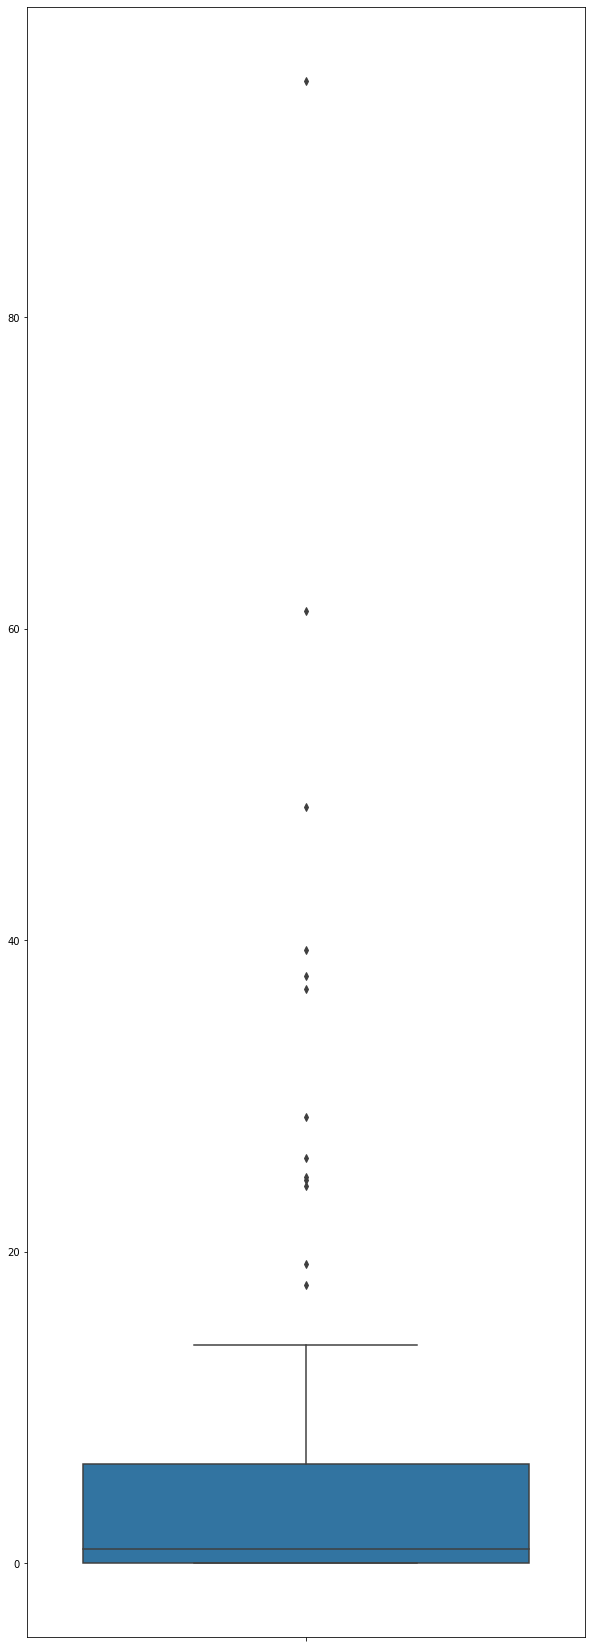

In [149]:
plt.figure(figsize=(10,30))
sns.boxplot(y = y_test)

### Result

By tunning the model we get a bit of improvement, our MAE goes down from 9.13 to 8.94. As the plot reflects, our test set as the same as our total dataset, it is skewed. This is mostly due we have a lot of data with label 0. In our test set for example, 48% of the data is 0. This make it harder to build the model with a good accuracy. Following, we are going to use only the data that led to the happening of fire. In other words, we are going to eliminate the data that did not cause fire and predict, once a fire started in the forest, how many hectareas of land can burn according to the value of festures such as temperature, month, FFMC, DC and others

## 3. Using the affected areas

In [185]:
data_aff = pd.read_csv('forest_fires_affected_areas.csv')
data_aff.drop('Unnamed: 0', axis=1, inplace=True)
data_aff.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,5,4,2,1,86.8,15.6,48.3,3.9,12.4,53,2.2,0.0,6.38
1,7,4,2,1,83.9,8.7,32.1,2.1,8.8,68,2.2,0.0,13.05
2,4,5,2,1,85.0,9.0,56.9,3.5,10.1,62,1.8,0.0,51.78
3,7,4,2,2,84.7,9.5,58.3,4.1,7.5,71,6.3,0.0,9.96
4,6,5,2,3,75.1,4.4,16.2,1.9,4.6,82,6.3,0.0,5.39


In [177]:
data_aff.describe()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000
mean,4.807407,4.366667,7.759259,3.955556,91.034074,114.707778,570.867037,9.177037,19.311111,43.733333,4.112963,0.028889,24.600185
std,2.383326,1.170740,2.115048,2.108107,3.709020,61.786520,229.981242,4.147350,6.179444,15.080059,1.884573,0.398392,86.501635
min,1.000000,2.000000,2.000000,1.000000,63.500000,3.200000,15.300000,0.800000,2.200000,15.000000,0.400000,0.000000,0.090000
25%,3.000000,4.000000,8.000000,2.000000,90.325000,82.900000,486.500000,6.800000,16.125000,33.000000,2.700000,0.000000,2.140000
50%,5.000000,4.000000,8.000000,4.000000,91.700000,111.700000,665.600000,8.400000,20.100000,41.000000,4.000000,0.000000,6.370000
75%,7.000000,5.000000,9.000000,6.000000,92.975000,141.300000,721.325000,11.375000,23.400000,53.000000,4.900000,0.000000,15.422500
max,9.000000,9.000000,12.000000,7.000000,96.200000,291.300000,860.600000,22.700000,33.300000,96.000000,9.400000,6.400000,1090.840000


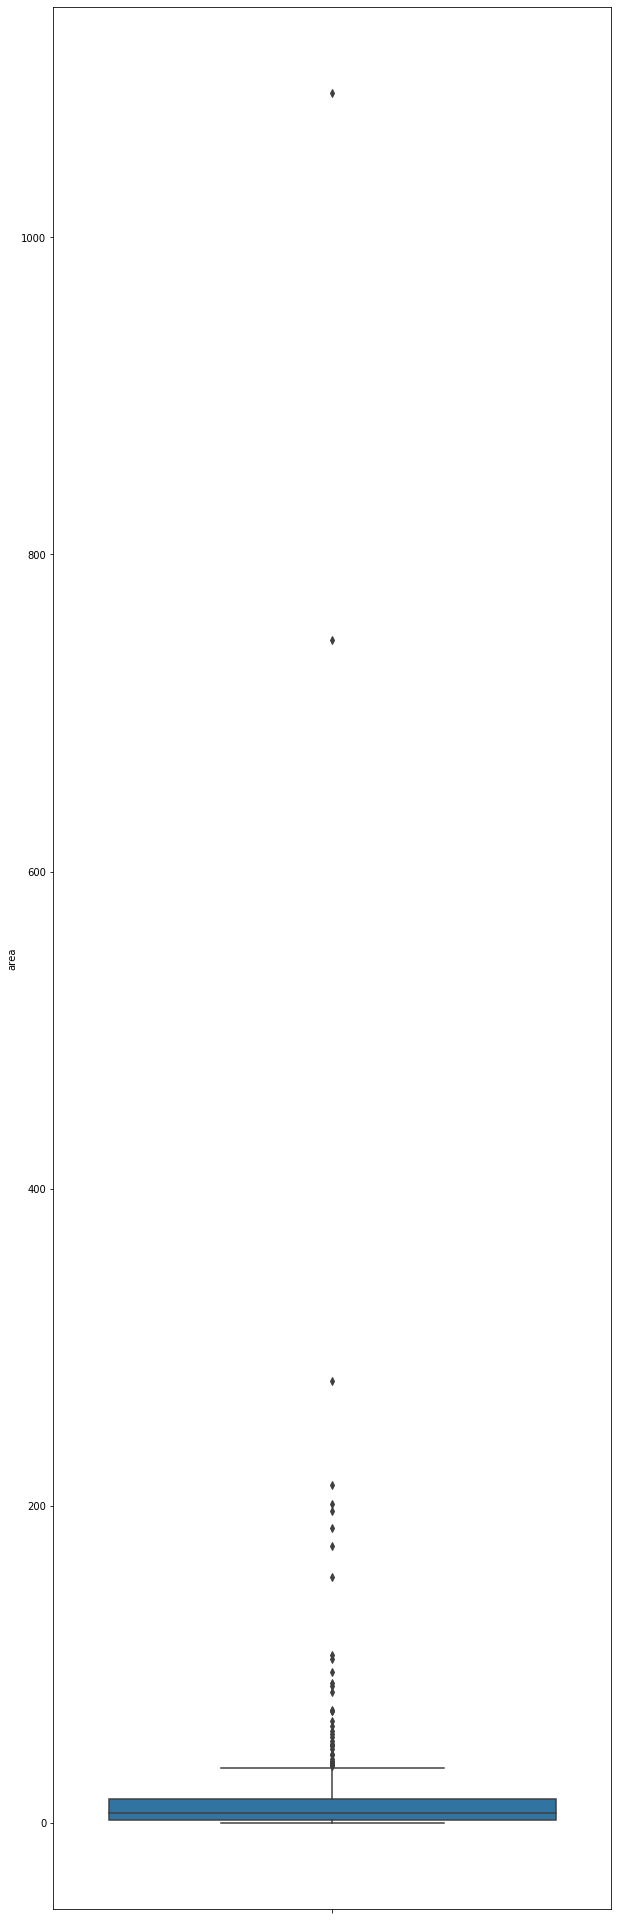

In [182]:
plt.figure(figsize=(10,35))
sns.boxplot(y=data_aff.area)

#### Analysis

This dataset presents a few huge outliers that will affect the model. Let's see how. In the following dataset with will try the same procedure but this time without the outliers

In [186]:
np.random.seed(42)

data_aff.drop(['ISI', 'wind', 'rain', 'day', 'X', 'Y'], axis=1, inplace=True)


X = data_aff.drop('area', axis=1)
y = data_aff['area']

X = cat_trans(X)

#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Scaling the features using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
y_train = np.array(y_train).reshape(-1,1)
y_test = np.array(y_test).reshape(-1,1)
y_train_scaled = scaler.fit_transform(y_train)
y_test_scaled = scaler.fit_transform(y_test)

# Fitting the model
model.fit(X_train_scaled, y_train_scaled)

# Making predictions
pred = model.predict(X_test_scaled)

# Unscalling the predictions
pred_u = scaler.inverse_transform(np.array(pred).reshape(-1, 1))
y_test_u = scaler.inverse_transform(np.array(y_test_scaled).reshape(-1, 1))
diff = np.array(pred_u) - np.array(y_test_u)
summary_diff = pd.DataFrame(np.concatenate((pred_u, y_test_u, diff), axis=1), columns=["Predictions", "Real", "Difference"])



print(
"R2 square: ", r2_score(y_test_scaled, pred), " Mean Absolute Error: ", mean_absolute_error(y_test_scaled, pred),
    " Mean Squared Error: ", mean_squared_error(y_test_scaled, pred), 
 )

R2 square:  -0.2147518805577595  Mean Absolute Error:  0.0718182383979972  Mean Squared Error:  0.017920005490973098


C:\Users\sandra\Desktop\Miniconda_projects\projects\forest_fires\env\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [187]:
# Evaluating the model in the unscaled predictions
r2_score(y_test, pred_u), mean_absolute_error(y_test, pred_u), mean_squared_error(y_test, pred_u)

(-0.21475188055775973, 78.33574353261544, 21320.06781280597)

### Analysis of results

As we can see the two outliers affect way too much the accuracy of this mode. We will stop here and analysis the data without outliers

## 4. Using the hazard dataset with no outliers

In this section we will try to analyze only the data that led to the happening of fire but at the same time cutting the two big outliers presented in our original data. 

In [189]:
data_aff_cl = pd.read_csv('forestfires_affected_areas_no_outliers.csv')
model=SVR()
data_aff_cl.drop('Unnamed: 0', axis=1, inplace=True)
data_aff_cl.head()


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,5,4,2,1,86.8,15.6,48.3,3.9,12.4,53,2.2,0.0,6.38
1,7,4,2,1,83.9,8.7,32.1,2.1,8.8,68,2.2,0.0,13.05
2,4,5,2,1,85.0,9.0,56.9,3.5,10.1,62,1.8,0.0,51.78
3,7,4,2,2,84.7,9.5,58.3,4.1,7.5,71,6.3,0.0,9.96
4,6,5,2,3,75.1,4.4,16.2,1.9,4.6,82,6.3,0.0,5.39


In [190]:
data_aff_cl.describe()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000
mean,4.791045,4.358209,7.753731,3.940299,91.014552,114.282090,570.004104,9.161567,19.258955,43.858209,4.110448,0.029104,17.928843
std,2.383070,1.170185,2.121538,2.106744,3.714610,61.663591,230.619948,4.152628,6.171885,15.066471,1.890991,0.399874,35.851567
min,1.000000,2.000000,2.000000,1.000000,63.500000,3.200000,15.300000,0.800000,2.200000,15.000000,0.400000,0.000000,0.090000
25%,2.750000,4.000000,8.000000,2.000000,90.300000,82.625000,480.800000,6.800000,16.100000,33.000000,2.700000,0.000000,2.137500
50%,5.000000,4.000000,8.000000,4.000000,91.650000,111.700000,665.450000,8.400000,20.100000,41.000000,4.000000,0.000000,6.330000
75%,7.000000,5.000000,9.000000,6.000000,92.925000,141.300000,721.400000,11.325000,23.325000,53.000000,4.900000,0.000000,14.845000
max,9.000000,9.000000,12.000000,7.000000,96.200000,291.300000,860.600000,22.700000,33.300000,96.000000,9.400000,6.400000,278.530000


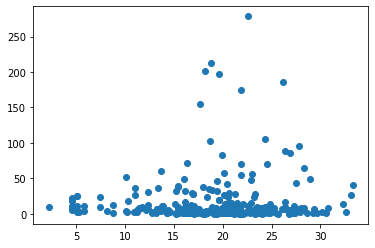

In [191]:
plt.scatter(data_aff_cl.temp, data_aff_cl.area)

#### Analysis of graph:

We can notice a few outliers but they make less impact in our dataset that the prior ones.

### Modelling

In [216]:
np.random.seed(42)

data_aff_cl.drop(['ISI', 'wind', 'rain', 'day', 'X', 'Y'], axis=1, inplace=True)


X = data_aff_cl.drop('area', axis=1)
y = data_aff_cl['area']

X = cat_trans(X)

#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Scaling the features using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
y_train = np.array(y_train).reshape(-1,1)
y_test = np.array(y_test).reshape(-1,1)
y_train_scaled = scaler.fit_transform(y_train)
y_test_scaled = scaler.fit_transform(y_test)

# Fitting the model
model.fit(X_train_scaled, y_train_scaled)

# Making predictions
pred = model.predict(X_test_scaled)

# Unscalling the predictions
pred_u = scaler.inverse_transform(np.array(pred).reshape(-1, 1))
y_test_u = scaler.inverse_transform(np.array(y_test_scaled).reshape(-1, 1))
diff = np.array(pred_u) - np.array(y_test_u)
summary_diff = pd.DataFrame(np.concatenate((pred_u, y_test_u, diff), axis=1), columns=["Predictions", "Real", "Difference"])



print(
"R2 square: ", r2_score(y_test_scaled, pred), " Mean Absolute Error: ", mean_absolute_error(y_test_scaled, pred),
    " Mean Squared Error: ", mean_squared_error(y_test_scaled, pred), 
 )

KeyError: "['ISI' 'wind' 'rain' 'day' 'X' 'Y'] not found in axis"

#### Evaluation of the model

In [193]:
# Evaluating the model in the unscaled predictions
r2_score(y_test, pred_u), mean_absolute_error(y_test, pred_u), mean_squared_error(y_test, pred_u)

(0.013562411487980763, 21.722255650066643, 1315.98922453386)

#### Tuning

In [194]:
data_aff_cl = pd.read_csv('forestfires_affected_areas_no_outliers.csv')

svr_tuning_model(data_aff_cl)

C:\Users\sandra\Desktop\Miniconda_projects\projects\forest_fires\env\lib\site-packages\sklearn\model_selection\_search.py:277: UserWarning: The total space of parameters 8 is smaller than n_iter=100. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\sandra\Desktop\Miniconda_projects\projects\forest_fires\env\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sandra\Desktop\Miniconda_projects\projects\forest_fires\env\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sandra\Des

Fitting 20 folds for each of 8 candidates, totalling 160 fits


C:\Users\sandra\Desktop\Miniconda_projects\projects\forest_fires\env\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sandra\Desktop\Miniconda_projects\projects\forest_fires\env\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sandra\Desktop\Miniconda_projects\projects\forest_fires\env\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sandra\Desktop\Miniconda_projects\projects\forest_fires\env\lib\

C:\Users\sandra\Desktop\Miniconda_projects\projects\forest_fires\env\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sandra\Desktop\Miniconda_projects\projects\forest_fires\env\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sandra\Desktop\Miniconda_projects\projects\forest_fires\env\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sandra\Desktop\Miniconda_projects\projects\forest_fires\env\lib\

C:\Users\sandra\Desktop\Miniconda_projects\projects\forest_fires\env\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sandra\Desktop\Miniconda_projects\projects\forest_fires\env\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sandra\Desktop\Miniconda_projects\projects\forest_fires\env\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sandra\Desktop\Miniconda_projects\projects\forest_fires\env\lib\

C:\Users\sandra\Desktop\Miniconda_projects\projects\forest_fires\env\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sandra\Desktop\Miniconda_projects\projects\forest_fires\env\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sandra\Desktop\Miniconda_projects\projects\forest_fires\env\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sandra\Desktop\Miniconda_projects\projects\forest_fires\env\lib\

{'kernel': 'poly', 'gamma': 'scale'}


C:\Users\sandra\Desktop\Miniconda_projects\projects\forest_fires\env\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:    3.6s finished
C:\Users\sandra\Desktop\Miniconda_projects\projects\forest_fires\env\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [200]:
model = SVR(kernel='poly', gamma='scale')
model.fit(X_train_scaled, y_train_scaled)
pred_cl = model.predict(X_test_scaled)
pred_u = scaler.inverse_transform(np.array(pred_cl).reshape(-1, 1))
y_test_u = scaler.inverse_transform(np.array(y_test_scaled).reshape(-1, 1))
diff = np.array(pred_u) - np.array(y_test_u)
summary_diff = pd.DataFrame(np.concatenate((pred_u, y_test_u, diff), axis=1), columns=["Predictions", "Real", "Difference"])
r2_score(y_test, pred_u), mean_absolute_error(y_test, pred_u), mean_squared_error(y_test, pred_u)

C:\Users\sandra\Desktop\Miniconda_projects\projects\forest_fires\env\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(-0.029314346771640576, 20.575970679142756, 1373.1903617469288)

In [202]:
np.mean(y_test), np.median(y_test)

(16.912686567164176, 5.18)

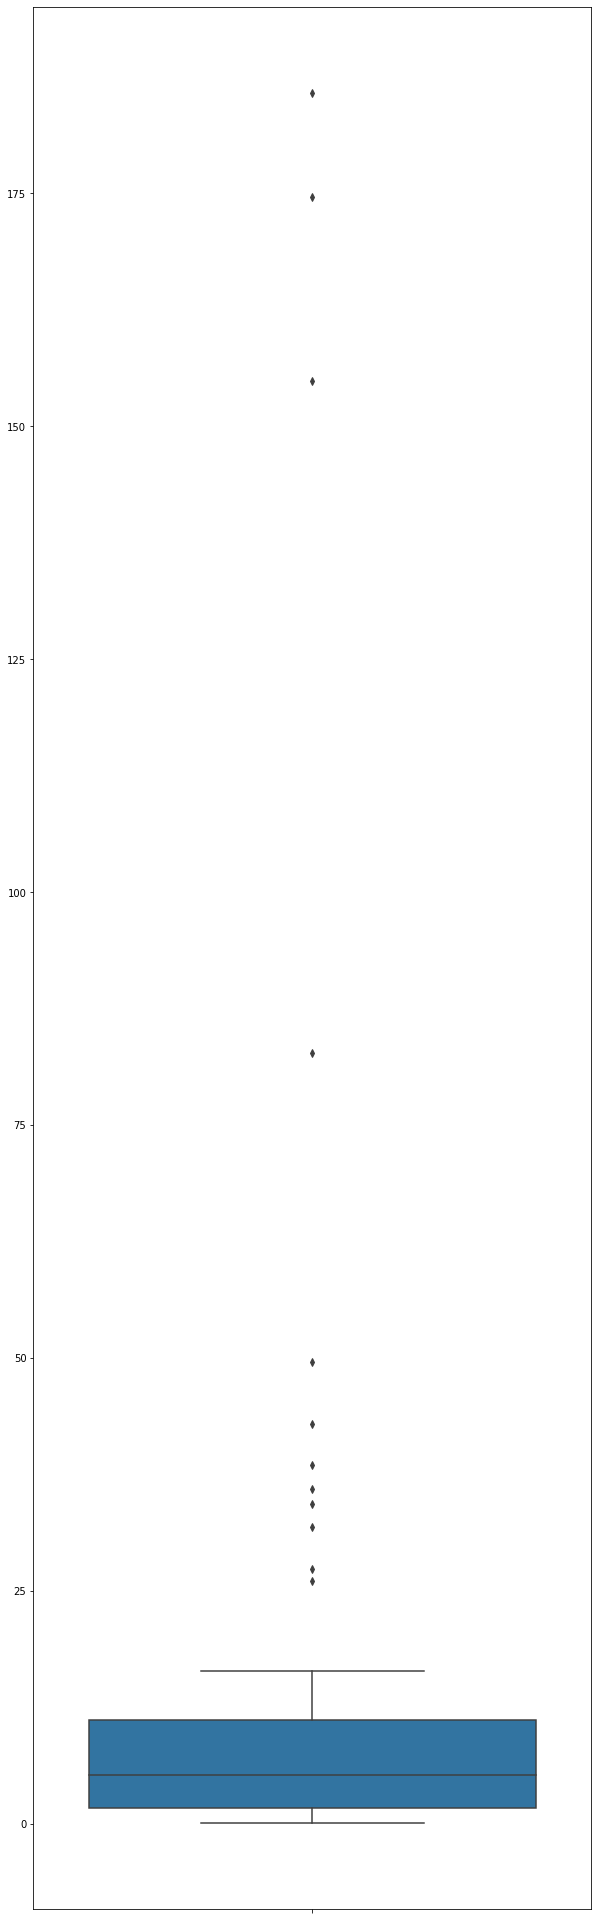

In [205]:
plt.figure(figsize=(10,35))
sns.boxplot(y=y_test)

### Results and Conclusions

As we could observe, we could get a slightly improvement when tuning the model and removing outliers. 

As the graph above describes, this model is hardly affected by outliers, most of our area data are below 25 ha, and in few ocassions there have been registered forest fire that have covered areas above 25 ha.This provokes that our model by using SVR. Even though we could remove these outliers I think this data is to have in consideration in real practice. In other words, we want to be able to predict when the conditions are favorable to cause the a forest fire that may harm more than 25 ha of land.

To solve this problem, I have divided a different dataset to build a classification model that predicts whether a forest fire can go over 25ha.

At the same time, we are going to try to get a better solution to the problem of this notebook by using Decision Tree Regressor. Let'see if we can get better results!!

### Result
With this dataset we get a light better model

## Feature Importance

In [213]:
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                      "feature_importances": importances})
         .sort_values("feature_importances", ascending = False)
         .reset_index(drop=True))
    
    # Plot the dataframe
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:20])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature Importance")
    ax.invert_yaxis()

In [214]:
X_train.columns

Index(['month', 'FFMC', 'DMC', 'DC', 'temp', 'RH'], dtype='object')

In [215]:
plot_features(X_train.columns, model.feature_importances_)

AttributeError: 'SVR' object has no attribute 'feature_importances_'

We can see that FFMC is the attribute that influences the least on our model. Let's try by removing this feature.

In [228]:
data = pd.read_csv('forestfires_affected_areas_no_outliers.csv')
data.drop(['Unnamed: 0', 'FFMC'], axis=1, inplace=True)
model = DecisionTreeRegressor( min_samples_split= 4, min_samples_leaf = 8, max_features = 'sqrt', criterion= 'mse')
model_test(model, data)

R2 square:  -0.10661338346089688  Mean Absolute Error:  0.09521405845104823  Mean Squared Error:  0.04282478229798964 
     Predictions    Real  Difference
0      3.168526  185.76 -182.591474
1     40.481029   34.36    6.121029
2      9.422859    2.53    6.892859
3      5.069259    3.30    1.769259
4      4.555658   82.75  -78.194342
..          ...     ...         ...
62     5.489478    2.03    3.459478
63    11.467590    1.64    9.827590
64     8.926505   49.59  -40.663495
65     8.926505    2.07    6.856505
66    40.481029    1.63   38.851029

[67 rows x 3 columns] DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=8, min_samples_split=4,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best') [[0.7        0.2933009

#### Result

Removing FFMC column did not bring better results. Next, we will try gradiend boosting as our last model

## Summary

In this document we have tried the models Support Vector Machine for different datasets and we have tune their different hyperparameters to get the best possible results.
The resultant models are completely underfitting. We must probably would have to do more modifications to the dataset in order to get a more suitable prediction. 
Also, it has to be taken into account the amount of data we have to predict a more accurate solution. 

In the research paper, they convert the area data into a ln(x+1)

(array([222.,  26.,   8.,   5.,   0.,   1.,   2.,   3.,   0.,   1.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

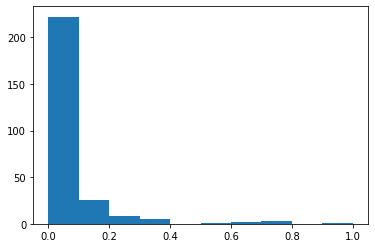

In [9]:
scaler = MinMaxScaler()
data = pd.read_csv('forestfires_affected_areas_no_outliers.csv')
y = data['area']
y = np.array(y).reshape(-1,1)
y_scaled = scaler.fit_transform(y)
plt.hist(y_scaled)

(array([ 2.,  7., 18., 46., 46., 67., 32., 30., 13.,  7.]),
 array([-2.40794561e+00, -1.60419847e+00, -8.00451332e-01,  3.29580599e-03,
         8.07042944e-01,  1.61079008e+00,  2.41453722e+00,  3.21828436e+00,
         4.02203150e+00,  4.82577864e+00,  5.62952577e+00]),
 <a list of 10 Patch objects>)

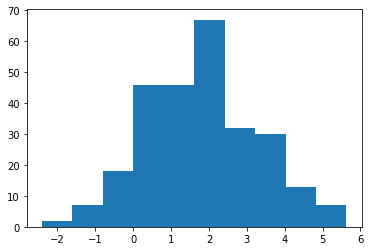

In [12]:
plt.hist(np.log(data["area"]))

In [21]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data = pd.read_csv('forest_fires_affected_areas.csv')
data.drop('Unnamed: 0', axis=1, inplace=True)
data.drop(['ISI', 'wind', 'rain', 'day', 'X', 'Y'], axis=1, inplace=True)

X = data.drop('area', axis=1)
y = data['area']

X = cat_trans(X)

#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Scaling the features
#scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
y_train = np.array(y_train).reshape(-1,1)
y_test = np.array(y_test).reshape(-1,1)
y_train_scaled = scaler.fit_transform(y_train)
y_test_scaled = scaler.transform(y_test)

model = DecisionTreeRegressor()
model.fit(X_train_scaled, y_train_scaled)
r2_score(y_test_scaled, model.predict(X_test_scaled))

-0.49490955741002707

In [22]:
y_test.mean()

29.552058823529407

In [26]:
np.median(y_test_scaled)

-0.2725306970040863

In [27]:
np.mean(y_test_scaled)

0.10406823303740892

In [ ]:
y_test